In [1]:
from math import sqrt

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation

import numpy as np
import qutip as q
q.settings.colorblind_safe = True

from Fock_space_func import solve_qed, result_qed
from Fock_space_func import compute_entropy, compute_truncation, compute_truncation_both
from Fock_space_func import plot_pos_entropy, plot_fock_space_trunc, plot_fock_space_trunc_both
from Fock_space_func import find_optimal_truncation
from Fock_space_func import print_truncation_statistics, print_optimal_points_summary, print_detailed_threshold_analysis, print_recommendations

from Cache_results import cached_result_qed

from tqdm import tqdm

In [2]:
# Create data grid
N_vals = np.linspace(2, 50, 50-2+1)  # Reduced for testing
M_vals = np.linspace(2, 50, 50-2+1)  # Reduced for testing
Ns, Ms = np.meshgrid(N_vals, M_vals)

In [3]:
results = cached_result_qed(N_vals, M_vals, Ns, Ms)

Loading cached results from cache_of_results\result_qed_bd0981bee21c0beacd209376cb64f1fb.pkl


In [4]:
print("Computing entropy matrix...")
entropy_matrix = compute_entropy(results)

Computing entropy matrix...


Progress: 100%|████████████████████████████████████████████████████████████| 2401/2401 [00:53<00:00, 45.29it/s]


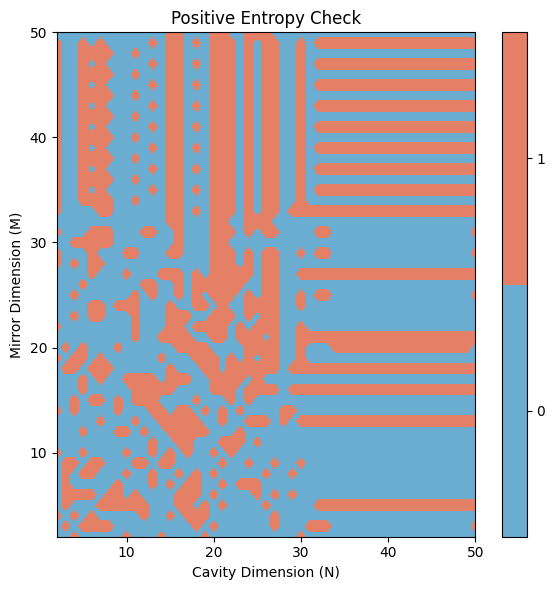

In [5]:
plot_pos_entropy(Ns, Ms, entropy_matrix)

Accepted values of truncation: 0.9954-1.0046
Computing truncation matrix...


Progress: 100%|██████████████████████████████████████████████████████████| 2401/2401 [00:00<00:00, 2694.03it/s]


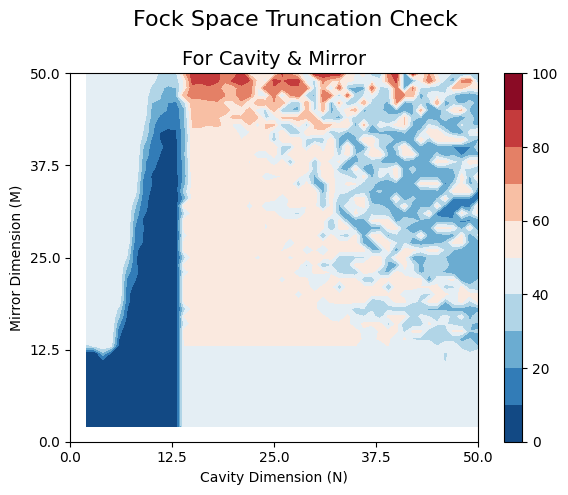

In [6]:
tolerance = 0.0046
print(f"Accepted values of truncation: {1-tolerance}-{1+tolerance}")

print("Computing truncation matrix...")
truncation_matrix_both = compute_truncation_both(Ns, Ms, results, tolerance)
plot_fock_space_trunc_both(Ns, Ms, N_vals, M_vals, truncation_matrix_both)

In [8]:
# Truncation threshold
min_truc = 90

# Find optimal points
optimal_points,_ = find_optimal_truncation(truncation_matrix_both, entropy_matrix,
                                           N_vals, M_vals, min_truc)

# Print optimal points summary
print_optimal_points_summary(optimal_points, min_truc, entropy_matrix)


OPTIMAL POINTS SUMMARY (Truncation ≥ 90)
Total optimal points found: 2

Top 5 smallest dimension combinations:
--------------------------------------------------
      N       M    Truncation    N+M       Pos. Ent.
--------------------------------------------------
 1.  30.0    50.0        90.0    80.0       0e+00
 2.  42.0    50.0        90.0    92.0       0e+00

Optimal Points Statistics:
------------------------------
Min N:          30.0
Max N:          42.0
Min M:          50.0
Max M:          50.0
Avg Truncation: 90.0 ± 0.0


In [24]:
# Truncation threshold
min_truc = 90

tolerances = np.linspace(0.001, 0.0040, 100)
tolerances

array([0.001     , 0.0010303 , 0.00106061, 0.00109091, 0.00112121,
       0.00115152, 0.00118182, 0.00121212, 0.00124242, 0.00127273,
       0.00130303, 0.00133333, 0.00136364, 0.00139394, 0.00142424,
       0.00145455, 0.00148485, 0.00151515, 0.00154545, 0.00157576,
       0.00160606, 0.00163636, 0.00166667, 0.00169697, 0.00172727,
       0.00175758, 0.00178788, 0.00181818, 0.00184848, 0.00187879,
       0.00190909, 0.00193939, 0.0019697 , 0.002     , 0.0020303 ,
       0.00206061, 0.00209091, 0.00212121, 0.00215152, 0.00218182,
       0.00221212, 0.00224242, 0.00227273, 0.00230303, 0.00233333,
       0.00236364, 0.00239394, 0.00242424, 0.00245455, 0.00248485,
       0.00251515, 0.00254545, 0.00257576, 0.00260606, 0.00263636,
       0.00266667, 0.00269697, 0.00272727, 0.00275758, 0.00278788,
       0.00281818, 0.00284848, 0.00287879, 0.00290909, 0.00293939,
       0.0029697 , 0.003     , 0.0030303 , 0.00306061, 0.00309091,
       0.00312121, 0.00315152, 0.00318182, 0.00321212, 0.00324

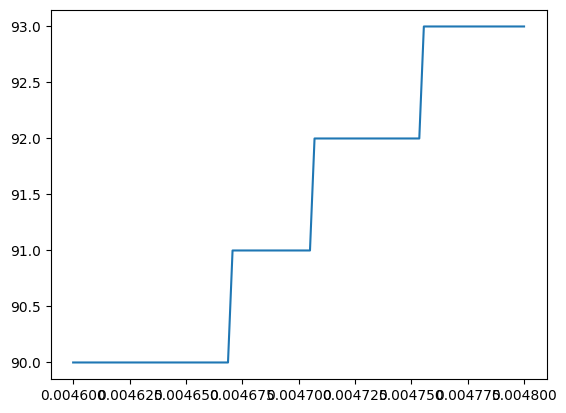

In [22]:
trnc_tol = np.zeros(len(tolerances))
for idx, tolerance in enumerate(tolerances):
    truncation_matrix_both = compute_truncation_both(Ns, Ms, results, tolerance)
    # Find optimal points
    optimal_points,_ = find_optimal_truncation(truncation_matrix_both, entropy_matrix,
                                               N_vals, M_vals, min_truc)
    M, N, trnc, ent = optimal_points[0]
    trnc_tol[idx] = trnc

In [ ]:
trnc_tol